In [34]:
#Cargando librerias necesarias
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

#Cargando el dataset
housing = fetch_california_housing()

#Creando un dataframe con los datos
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

# #Quitando los valores atipicos de todas las columnas por medio del rango intercuartilico
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


#Creando conjunto de entrenamiento, validacion y prueba 
X_train_full, X_test, y_train_full, y_test = train_test_split(df.drop('target', axis=1), df['target'], random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape) 

(11610, 8)
(3870, 8)
(5160, 8)
(11610,)
(3870,)
(5160,)


In [35]:
#Escalando los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
#Creando el modelo
model = keras.models.Sequential([
    keras.layers.Dense(200, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])

#Compilando el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.R2Score()])

#Entrenando el modelo
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100


c:\Users\Simon R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5361 - r2_score: -0.1409 - root_mean_squared_error: 1.2122 - val_loss: 0.5641 - val_r2_score: 0.5782 - val_root_mean_squared_error: 0.7511
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6305 - r2_score: 0.5327 - root_mean_squared_error: 0.7939 - val_loss: 0.4078 - val_r2_score: 0.6951 - val_root_mean_squared_error: 0.6386
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5399 - r2_score: 0.5928 - root_mean_squared_error: 0.7347 - val_loss: 0.4254 - val_r2_score: 0.6819 - val_root_mean_squared_error: 0.6523
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5177 - r2_score: 0.6158 - root_mean_squared_error: 0.7193 - val_loss: 0.3867 - val_r2_score: 0.7109 - val_root_mean_squared_error: 0.6219
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4712 - r2_score: 0.6462 - root_mean_squared_error: 0.6863 - val_loss: 0.3716 - val_r2_score: 0.7221 - val_root_mean_squared_error: 0.6096
Epoch 

<Axes: >

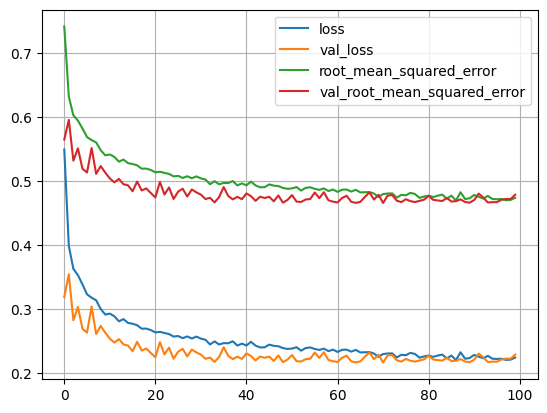

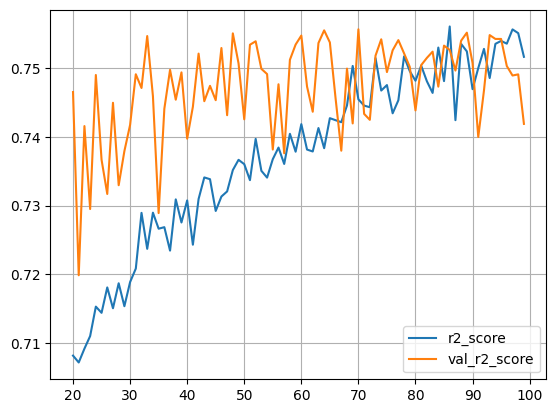

In [32]:
#Graficando historial de entrenamiento

dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['r2_score', 'val_r2_score']][20:].plot(grid=True)